In [1]:
import pandas  as pd
import numpy as np
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
import biogeme.expressions as exp
import seaborn as sns
import matplotlib.pyplot as plt
from biogeme.expressions import Beta, DefineVariable
import biogeme.version as ver
from biogeme.expressions import Beta

In [2]:
# Load the Data
df=pd.read_csv('Dataset 1 (1).csv')

In [3]:
df

,HHID,ORIGIN_OF_TRIP,DESTINATION_OF_TRIP,TT_WALK,WALKABILITY_INDEX,TT_CYCLE,BIKEABILITY_INDEX,TT_PT,FARE_PT,WT_PT,...,CC_CAR,INCOME,GENDER,AGE,CAR_OWNERSHIP,CHOSEN_MODE,AV_WALK,AV_CYCLE,AV_PT,AV_CAR
0,1,3,7,27,97,35,63,46,7,19,...,2,86,0,23,0,2,1,1,1,1
1,2,8,1,31,100,31,40,27,2,18,...,9,56,0,36,1,3,1,1,1,1
2,3,9,4,52,14,13,22,29,2,5,...,4,59,1,46,0,2,1,1,1,1
3,4,8,6,33,28,16,70,32,2,9,...,2,29,1,27,0,3,1,1,1,1
4,5,2,2,55,11,20,96,51,3,18,...,6,64,0,49,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,5,52,39,23,41,13,6,14,...,5,13,1,46,0,2,1,1,1,1
9996,9997,6,7,41,3,12,15,34,3,12,...,7,61,1,68,0,4,1,1,1,1
9997,9998,7,5,55,32,41,67,41,1,2,...,3,45,1,43,1,2,1,1,1,1
9998,9999,4,9,19,77,36,90,55,2,6,...,9,25,1,26,0,1,1,1,1,1


In [4]:
# Convert pandas dataframe object to Biogeme Database
database = db.Database('application', df)

In [5]:
# display database info
display(database.getSampleSize())
display(database.variables)

10000

{'HHID': HHID,
 'ORIGIN_OF_TRIP': ORIGIN_OF_TRIP,
 'DESTINATION_OF_TRIP': DESTINATION_OF_TRIP,
 'TT_WALK': TT_WALK,
 'WALKABILITY_INDEX': WALKABILITY_INDEX,
 'TT_CYCLE': TT_CYCLE,
 'BIKEABILITY_INDEX': BIKEABILITY_INDEX,
 'TT_PT': TT_PT,
 'FARE_PT': FARE_PT,
 'WT_PT': WT_PT,
 'AT_PT': AT_PT,
 'AC_PT': AC_PT,
 'TT_CAR': TT_CAR,
 'FC_CAR': FC_CAR,
 'PC_CAR': PC_CAR,
 'CC_CAR': CC_CAR,
 'INCOME': INCOME,
 'GENDER': GENDER,
 'AGE': AGE,
 'CAR_OWNERSHIP': CAR_OWNERSHIP,
 'CHOSEN_MODE': CHOSEN_MODE,
 'AV_WALK': AV_WALK,
 'AV_CYCLE': AV_CYCLE,
 'AV_PT': AV_PT,
 'AV_CAR': AV_CAR}

In [6]:
# The following statement allows you to use the names of the
# variable as Python variable.
globals().update(database.variables)

In [7]:
# Parameters to be estimated
# Arguments:
#   - 1  Name for report; Typically, the same as the variable.
#   - 2  Starting value.
#   - 3  Lower bound.
#   - 4  Upper bound.
#   - 5  0: estimate the parameter, 1: keep it fixed.

beta_WALK=Beta('beta_WALK',0,None,None,1)
beta_CYCLE=Beta('beta_CYCLE',0,None,None,0)
beta_PT=Beta('beta_PT',0,None,None,0)
beta_CAR=Beta('beta_CAR',0,None,None,0)


beta_TT_WALK = Beta('beta_TT_WALK', 0, None, None, 0)
beta_WALKABILITY_INDEX = Beta('beta_WALKABILITY_INDEX', 0, None, None, 0)
beta_AV_WALK = Beta('beta_AV_WALK', 0, None, None, 0)

beta_TT_CYCLE = Beta('beta_TT_CYCLE', 0, None, None, 0)
beta_BIKEABILITY_INDEX = Beta('beta_BIKEABILITY_INDEX', 0, None, None, 0)
beta_AV_CYCLE = Beta('beta_AV_CYCLE', 0, None, None, 0)

beta_TT_PT = Beta('beta_TT_PT', 0, None, None, 0)
beta_FARE_PT = Beta('beta_FARE_PT', 0, None, None, 0)
beta_WT_PT = Beta('beta_WT_PT', 0, None, None, 0)
beta_AT_PT = Beta('beta_AT_PT', 0, None, None, 0)
beta_AC_PT = Beta('beta_AC_PT', 0, None, None, 0)
beta_AV_PT = Beta('beta_AV_PT', 0, None, None, 0)

beta_TT_CAR = Beta('beta_TT_CAR', 0, None, None, 0)
beta_FC_CAR = Beta('beta_FC_CAR', 0, None, None, 0)
beta_PC_CAR = Beta('beta_PC_CAR', 0, None, None, 0)
beta_CC_CAR = Beta('beta_CC_CAR', 0, None, None, 0)
beta_AV_CAR = Beta('beta_AV_CAR', 0, None, None, 0)

beta_AGE = Beta('beta_AGE', 0, None, None, 0)
beta_INCOME = Beta('beta_INCOME', 0, None, None, 0)
beta_GENDER = Beta('beta_GENDER', 0, None, None, 0)
beta_CAR_OWNERSHIP = Beta('beta_CAR_OWNERSHIP', 0, None, None, 0)

In [8]:
# Definition of Utility functions
V_Walk = beta_WALK + beta_TT_WALK*TT_WALK + beta_WALKABILITY_INDEX*WALKABILITY_INDEX + beta_AV_WALK*AV_WALK + beta_AGE*AGE + beta_INCOME*INCOME + beta_GENDER*GENDER + beta_CAR_OWNERSHIP*CAR_OWNERSHIP
V_Cycle = beta_CYCLE + beta_TT_CYCLE*TT_CYCLE + beta_BIKEABILITY_INDEX*BIKEABILITY_INDEX + beta_AV_CYCLE*AV_CYCLE + beta_AGE*AGE + beta_INCOME*INCOME + beta_GENDER*GENDER + beta_CAR_OWNERSHIP*CAR_OWNERSHIP
V_PT = beta_PT + beta_TT_PT*TT_PT + beta_FARE_PT*FARE_PT + beta_WT_PT*WT_PT + beta_AT_PT*AT_PT + beta_AC_PT*AC_PT + beta_AV_PT*AV_PT + beta_AGE*AGE + beta_INCOME*INCOME + beta_GENDER*GENDER + beta_CAR_OWNERSHIP*CAR_OWNERSHIP
V_Car = beta_CAR + beta_TT_CAR*TT_CAR + beta_FC_CAR*FC_CAR + beta_PC_CAR*PC_CAR + beta_CC_CAR*CC_CAR + beta_AV_CAR*AV_CAR + beta_AGE*AGE + beta_INCOME*INCOME + beta_GENDER*GENDER + beta_CAR_OWNERSHIP*CAR_OWNERSHIP


In [9]:
# Associate utility functions with the numbering of alternatives
V = {1: V_Walk, 2: V_Cycle, 3: V_PT, 4:V_Car}


In [10]:
# Associate the availability conditions with the alternatives
Av_Walk=1
Av_Cycle=1
Av_PT=1
Av_Car=1

av = {1:Av_Walk, 2:Av_Cycle, 3:Av_PT, 4:Av_Car} 

In [11]:
# The choice model is a logit, with availability conditions
logprob = models.loglogit(V, av, CHOSEN_MODE)

In [12]:
# Create the Biogeme object
biogeme = bio.BIOGEME(database, logprob)
biogeme.modelName = 'model_with_biogeme'

In [13]:
# Estimate the parameters
results = biogeme.estimate()
estimated_parameters = results.getEstimatedParameters()

print(estimated_parameters)

                               Value   Rob. Std err    Rob. t-test  \
beta_AC_PT             -5.739653e-01   4.550400e-02  -1.261351e+01   
beta_AGE                6.915442e-14  1.797693e+308  3.853712e-322   
beta_AT_PT             -6.627252e-02   9.077845e-03  -7.300468e+00   
beta_AV_CAR             8.999415e-01   7.132144e-02   1.261811e+01   
beta_AV_CYCLE          -5.030920e-01   4.760343e-02  -1.056840e+01   
beta_AV_PT              6.696155e-01   1.278534e-01   5.237370e+00   
beta_AV_WALK           -1.066465e+00   8.265621e-02  -1.290242e+01   
beta_BIKEABILITY_INDEX  5.639092e-03   8.519408e-04   6.619112e+00   
beta_CAR                8.999415e-01   7.132144e-02   1.261811e+01   
beta_CAR_OWNERSHIP      0.000000e+00  1.797693e+308   0.000000e+00   
beta_CC_CAR            -1.280732e-01   1.272460e-02  -1.006501e+01   
beta_CYCLE             -5.030920e-01   4.760343e-02  -1.056840e+01   
beta_FARE_PT           -9.983834e-01   5.845787e-02  -1.707868e+01   
beta_FC_CAR         

In [14]:
# Load the optimized beta values
beta_values = results.getBetaValues()

In [15]:
walk_reduction = 0.1

walk_impr = 0
car_incr = 0
# Create a new dataframe with a reduction in TT_WALK
df_reduced = df.copy()
df_reduced['TT_WALK'] = (1 - walk_reduction) * df_reduced['TT_WALK']  # reduction
df_reduced['WALKABILITY_INDEX'] = (1 + walk_impr) * df_reduced['WALKABILITY_INDEX']  # increase
df_reduced['TT_CAR'] = (1 + car_incr) * df_reduced['TT_CAR']  # increase


# Convert the new dataframe to Biogeme Database
database_reduced = db.Database('application_reduced', df_reduced)



In [16]:
# Assign optimized beta values to utility functions in df_reduced
df_reduced['V_WALK'] = (
    0 +
    beta_values['beta_TT_WALK'] * df_reduced['TT_WALK'] +
    beta_values['beta_WALKABILITY_INDEX'] * df_reduced['WALKABILITY_INDEX'] +
    beta_values['beta_AV_WALK'] * df_reduced['AV_WALK'] +
    beta_values['beta_AGE'] * df_reduced['AGE'] +
    beta_values['beta_INCOME'] * df_reduced['INCOME'] +
    beta_values['beta_GENDER'] * df_reduced['GENDER'] +
    beta_values['beta_CAR_OWNERSHIP'] * df_reduced['CAR_OWNERSHIP']
)

df_reduced['V_CYCLE'] = (
    beta_values['beta_CYCLE'] +
    beta_values['beta_TT_CYCLE'] * df_reduced['TT_CYCLE'] +
    beta_values['beta_BIKEABILITY_INDEX'] * df_reduced['BIKEABILITY_INDEX'] +
    beta_values['beta_AV_CYCLE'] * df_reduced['AV_CYCLE'] +
    beta_values['beta_AGE'] * df_reduced['AGE'] +
    beta_values['beta_INCOME'] * df_reduced['INCOME'] +
    beta_values['beta_GENDER'] * df_reduced['GENDER'] +
    beta_values['beta_CAR_OWNERSHIP'] * df_reduced['CAR_OWNERSHIP']
)

df_reduced['V_PT'] = (
    beta_values['beta_PT'] +
    beta_values['beta_TT_PT'] * df_reduced['TT_PT'] +
    beta_values['beta_FARE_PT'] * df_reduced['FARE_PT'] +
    beta_values['beta_WT_PT'] * df_reduced['WT_PT'] +
    beta_values['beta_AT_PT'] * df_reduced['AT_PT'] +
    beta_values['beta_AC_PT'] * df_reduced['AC_PT'] +
    beta_values['beta_AV_PT'] * df_reduced['AV_PT'] +
    beta_values['beta_AGE'] * df_reduced['AGE'] +
    beta_values['beta_INCOME'] * df_reduced['INCOME'] +
    beta_values['beta_GENDER'] * df_reduced['GENDER'] +
    beta_values['beta_CAR_OWNERSHIP'] * df_reduced['CAR_OWNERSHIP']
)

df_reduced['V_CAR'] = (
    beta_values['beta_CAR'] +
    beta_values['beta_TT_CAR'] * df_reduced['TT_CAR'] +
    beta_values['beta_FC_CAR'] * df_reduced['FC_CAR'] +
    beta_values['beta_PC_CAR'] * df_reduced['PC_CAR'] +
    beta_values['beta_CC_CAR'] * df_reduced['CC_CAR'] +
    beta_values['beta_AV_CAR'] * df_reduced['AV_CAR'] +
    beta_values['beta_AGE'] * df_reduced['AGE'] +
    beta_values['beta_INCOME'] * df_reduced['INCOME'] +
    beta_values['beta_GENDER'] * df_reduced['GENDER'] +
    beta_values['beta_CAR_OWNERSHIP'] * df_reduced['CAR_OWNERSHIP']
)

In [17]:
# Calculate exponentials of utility functions for the reduced dataframe
df_reduced['EXP_V_WALK'] = np.exp(df_reduced['V_WALK'])
df_reduced['EXP_V_CYCLE'] = np.exp(df_reduced['V_CYCLE'])
df_reduced['EXP_V_PT'] = np.exp(df_reduced['V_PT'])
df_reduced['EXP_V_CAR'] = np.exp(df_reduced['V_CAR'])

# Calculate the probability of each mode using the utility functions from the original dataframe
df_reduced['P_WALK'] = df_reduced['EXP_V_WALK'] / (df_reduced['EXP_V_WALK'] + df_reduced['EXP_V_CYCLE'] + df_reduced['EXP_V_PT'] + df_reduced['EXP_V_CAR'])
df_reduced['P_CYCLE'] = df_reduced['EXP_V_CYCLE'] / (df_reduced['EXP_V_WALK'] + df_reduced['EXP_V_CYCLE'] + df_reduced['EXP_V_PT'] + df_reduced['EXP_V_CAR'])
df_reduced['P_PT'] = df_reduced['EXP_V_PT'] / (df_reduced['EXP_V_WALK'] + df_reduced['EXP_V_CYCLE'] + df_reduced['EXP_V_PT'] + df_reduced['EXP_V_CAR'])
df_reduced['P_CAR'] = df_reduced['EXP_V_CAR'] / (df_reduced['EXP_V_WALK'] + df_reduced['EXP_V_CYCLE'] + df_reduced['EXP_V_PT'] + df_reduced['EXP_V_CAR'])



In [18]:
# Map chosen mode to numerical values
mode_mapping = {'P_WALK': 1, 'P_CYCLE': 2, 'P_PT': 3, 'P_CAR': 4}
df_reduced['CHOSEN_MODE'] = df_reduced[['P_WALK', 'P_CYCLE', 'P_PT', 'P_CAR']].idxmax(axis=1).map(mode_mapping)

# The resulting 'CHOSEN_MODE' column now contains the numerical values (1, 2, 3, 4) for the chosen mode


In [19]:
df_reduced

,HHID,ORIGIN_OF_TRIP,DESTINATION_OF_TRIP,TT_WALK,WALKABILITY_INDEX,TT_CYCLE,BIKEABILITY_INDEX,TT_PT,FARE_PT,WT_PT,...,V_PT,V_CAR,EXP_V_WALK,EXP_V_CYCLE,EXP_V_PT,EXP_V_CAR,P_WALK,P_CYCLE,P_PT,P_CAR
0,1,3,7,24.3,97,35,63,46,7,19,...,-13.556022,-5.399475,0.143573,0.039822,0.000001,0.004519,0.764031,0.211914,0.000007,0.024048
1,2,8,1,27.9,100,31,40,27,2,18,...,-4.600114,-3.182507,0.114123,0.046932,0.010051,0.041482,0.536829,0.220767,0.047278,0.195127
2,3,9,4,46.8,14,13,22,29,2,5,...,-5.769841,-5.983681,0.013972,0.159200,0.003120,0.002520,0.078140,0.890320,0.017450,0.014090
3,4,8,6,29.7,28,16,70,32,2,9,...,-4.274373,-5.224386,0.053303,0.167393,0.013921,0.005384,0.222095,0.697470,0.058003,0.022432
4,5,2,2,49.5,11,20,96,51,3,18,...,-6.605574,-3.647728,0.011232,0.144455,0.001353,0.026050,0.061345,0.788986,0.007389,0.142281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,5,46.8,39,23,41,13,6,14,...,-8.341199,-1.991622,0.017409,0.084973,0.000238,0.136474,0.072812,0.355394,0.000997,0.570796
9996,9997,6,7,36.9,3,12,15,34,3,12,...,-9.040512,-3.042028,0.025641,0.164710,0.000119,0.047738,0.107641,0.691456,0.000498,0.200405
9997,9998,7,5,49.5,32,41,67,41,1,2,...,-4.724404,-7.029932,0.013510,0.026206,0.008876,0.000885,0.273060,0.529657,0.179396,0.017887
9998,9999,4,9,17.1,77,36,90,55,2,6,...,-6.903052,-7.235447,0.200903,0.043085,0.001005,0.000721,0.817632,0.175347,0.004089,0.002933


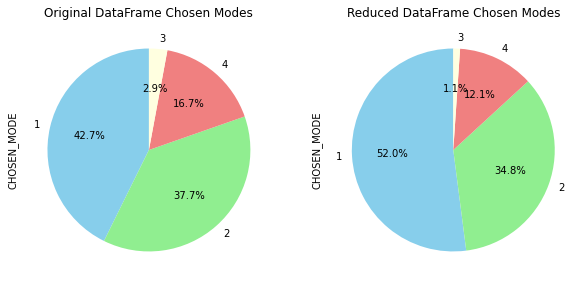

In [20]:
import matplotlib.pyplot as plt

# Original dataframe pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['CHOSEN_MODE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Original DataFrame Chosen Modes')

# Reduced dataframe pie chart
plt.subplot(1, 2, 2)
df_reduced['CHOSEN_MODE'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Reduced DataFrame Chosen Modes')

plt.show()




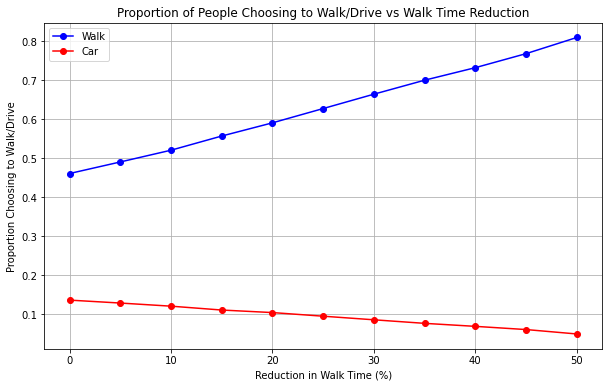

In [21]:
# Initialize lists to store results
reduction_percentages = np.linspace(0, 0.5, 11)  # from 0% to 50% in 10% increments
proportions_walking = []
proportions_driving = []

for reduction in reduction_percentages:
    # Apply reduction in TT_WALK
    df_temp = df.copy()
    df_temp['TT_WALK'] *= (1 - reduction)

    # Recalculate the utilities with the new TT_WALK
    df_temp['V_WALK'] = (
        0 +
        beta_values['beta_TT_WALK'] * df_temp['TT_WALK'] +
        beta_values['beta_WALKABILITY_INDEX'] * df_temp['WALKABILITY_INDEX'] +
        beta_values['beta_AV_WALK'] * df_temp['AV_WALK'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_CYCLE'] = (
        beta_values['beta_CYCLE'] +
        beta_values['beta_TT_CYCLE'] * df_temp['TT_CYCLE'] +
        beta_values['beta_BIKEABILITY_INDEX'] * df_temp['BIKEABILITY_INDEX'] +
        beta_values['beta_AV_CYCLE'] * df_temp['AV_CYCLE'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_PT'] = (
        beta_values['beta_PT'] +
        beta_values['beta_TT_PT'] * df_temp['TT_PT'] +
        beta_values['beta_FARE_PT'] * df_temp['FARE_PT'] +
        beta_values['beta_WT_PT'] * df_temp['WT_PT'] +
        beta_values['beta_AT_PT'] * df_temp['AT_PT'] +
        beta_values['beta_AC_PT'] * df_temp['AC_PT'] +
        beta_values['beta_AV_PT'] * df_temp['AV_PT'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_CAR'] = (
        beta_values['beta_CAR'] +
        beta_values['beta_TT_CAR'] * df_temp['TT_CAR'] +
        beta_values['beta_FC_CAR'] * df_temp['FC_CAR'] +
        beta_values['beta_PC_CAR'] * df_temp['PC_CAR'] +
        beta_values['beta_CC_CAR'] * df_temp['CC_CAR'] +
        beta_values['beta_AV_CAR'] * df_temp['AV_CAR'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )
    

    # Calculate exponentials of utility functions for the reduced dataframe
    df_temp['EXP_V_WALK'] = np.exp(df_temp['V_WALK'])
    df_temp['EXP_V_CYCLE'] = np.exp(df_temp['V_CYCLE'])
    df_temp['EXP_V_PT'] = np.exp(df_temp['V_PT'])
    df_temp['EXP_V_CAR'] = np.exp(df_temp['V_CAR'])

    # Calculate the probability of each mode using the utility functions from the original dataframe
    df_temp['P_WALK'] = df_temp['EXP_V_WALK'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_CYCLE'] = df_temp['EXP_V_CYCLE'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_PT'] = df_temp['EXP_V_PT'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_CAR'] = df_temp['EXP_V_CAR'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])


    # Create a boolean mask for each condition
    condition1w = df_temp['P_WALK'] > df_temp['P_CYCLE']
    condition2w = df_temp['P_WALK'] > df_temp['P_PT']
    condition3w = df_temp['P_WALK'] > df_temp['P_CAR']

    condition1d = df_temp['P_CAR'] > df_temp['P_CYCLE']
    condition2d = df_temp['P_CAR'] > df_temp['P_PT']
    condition3d = df_temp['P_CAR'] > df_temp['P_WALK']

    # Combine the conditions using the & operator to check if all conditions are True
    combined_conditionw = condition1w & condition2w & condition3w
    combined_conditiond = condition1d & condition2d & condition3d

    # Use sum() to count the number of True values in the combined condition
    proportion_walking = combined_conditionw.sum()/len(df_temp)
    proportions_walking.append(proportion_walking)

    proportion_driving = combined_conditiond.sum()/len(df_temp)
    proportions_driving.append(proportion_driving)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(reduction_percentages * 100, proportions_walking, marker='o', color='b', label = 'Walk')  # Multiply by 100 to convert to percentage
plt.plot(reduction_percentages * 100, proportions_driving, marker='o', color='r', label = 'Car')  # Multiply by 100 to convert to percentage
plt.xlabel('Reduction in Walk Time (%)')
plt.ylabel('Proportion Choosing to Walk/Drive')
plt.title('Proportion of People Choosing to Walk/Drive vs Walk Time Reduction')
plt.legend()
plt.grid(True)
plt.show()

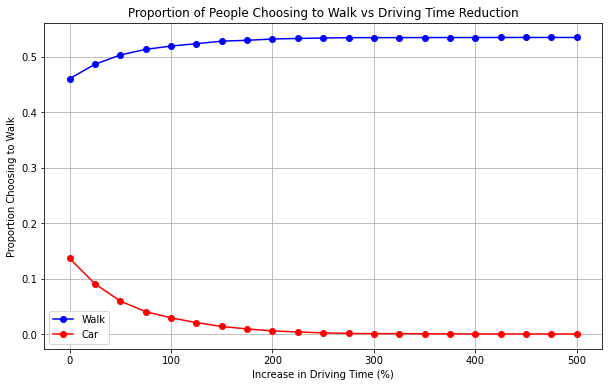

In [22]:
# Initialize lists to store results
increase_percentages = np.linspace(0, 5, 21)  # from 0% to 500% in 25% increments
proportions_walking = []
proportions_driving = []

for increase in increase_percentages:
    # Apply reduction in TT_WALK
    df_temp = df.copy()
    df_temp['TT_CAR'] *= (1 + increase)

    # Recalculate the utilities with the new TT_WALK
    df_temp['V_WALK'] = (
        0 +
        beta_values['beta_TT_WALK'] * df_temp['TT_WALK'] +
        beta_values['beta_WALKABILITY_INDEX'] * df_temp['WALKABILITY_INDEX'] +
        beta_values['beta_AV_WALK'] * df_temp['AV_WALK'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_CYCLE'] = (
        beta_values['beta_CYCLE'] +
        beta_values['beta_TT_CYCLE'] * df_temp['TT_CYCLE'] +
        beta_values['beta_BIKEABILITY_INDEX'] * df_temp['BIKEABILITY_INDEX'] +
        beta_values['beta_AV_CYCLE'] * df_temp['AV_CYCLE'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_PT'] = (
        beta_values['beta_PT'] +
        beta_values['beta_TT_PT'] * df_temp['TT_PT'] +
        beta_values['beta_FARE_PT'] * df_temp['FARE_PT'] +
        beta_values['beta_WT_PT'] * df_temp['WT_PT'] +
        beta_values['beta_AT_PT'] * df_temp['AT_PT'] +
        beta_values['beta_AC_PT'] * df_temp['AC_PT'] +
        beta_values['beta_AV_PT'] * df_temp['AV_PT'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_CAR'] = (
        beta_values['beta_CAR'] +
        beta_values['beta_TT_CAR'] * df_temp['TT_CAR'] +
        beta_values['beta_FC_CAR'] * df_temp['FC_CAR'] +
        beta_values['beta_PC_CAR'] * df_temp['PC_CAR'] +
        beta_values['beta_CC_CAR'] * df_temp['CC_CAR'] +
        beta_values['beta_AV_CAR'] * df_temp['AV_CAR'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )
    

    # Calculate exponentials of utility functions for the reduced dataframe
    df_temp['EXP_V_WALK'] = np.exp(df_temp['V_WALK'])
    df_temp['EXP_V_CYCLE'] = np.exp(df_temp['V_CYCLE'])
    df_temp['EXP_V_PT'] = np.exp(df_temp['V_PT'])
    df_temp['EXP_V_CAR'] = np.exp(df_temp['V_CAR'])

    # Calculate the probability of each mode using the utility functions from the original dataframe
    df_temp['P_WALK'] = df_temp['EXP_V_WALK'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_CYCLE'] = df_temp['EXP_V_CYCLE'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_PT'] = df_temp['EXP_V_PT'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_CAR'] = df_temp['EXP_V_CAR'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])


    # Create a boolean mask for each condition
    condition1w = df_temp['P_WALK'] > df_temp['P_CYCLE']
    condition2w = df_temp['P_WALK'] > df_temp['P_PT']
    condition3w = df_temp['P_WALK'] > df_temp['P_CAR']

    condition1d = df_temp['P_CAR'] > df_temp['P_CYCLE']
    condition2d = df_temp['P_CAR'] > df_temp['P_PT']
    condition3d = df_temp['P_CAR'] > df_temp['P_WALK']

    # Combine the conditions using the & operator to check if all conditions are True
    combined_conditionw = condition1w & condition2w & condition3w
    combined_conditiond = condition1d & condition2d & condition3d

    # Use sum() to count the number of True values in the combined condition
    proportion_walking = combined_conditionw.sum()/len(df_temp)
    proportions_walking.append(proportion_walking)

    proportion_driving = combined_conditiond.sum()/len(df_temp)
    proportions_driving.append(proportion_driving)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(increase_percentages * 100, proportions_walking, marker='o', color='b', label = 'Walk')  # Multiply by 100 to convert to percentage
plt.plot(increase_percentages * 100, proportions_driving, marker='o', color='r', label = 'Car')  # Multiply by 100 to convert to percentage
plt.xlabel('Increase in Driving Time (%)')
plt.ylabel('Proportion Choosing to Walk')
plt.title('Proportion of People Choosing to Walk vs Driving Time Reduction')
plt.legend()
plt.grid(True)
plt.show()

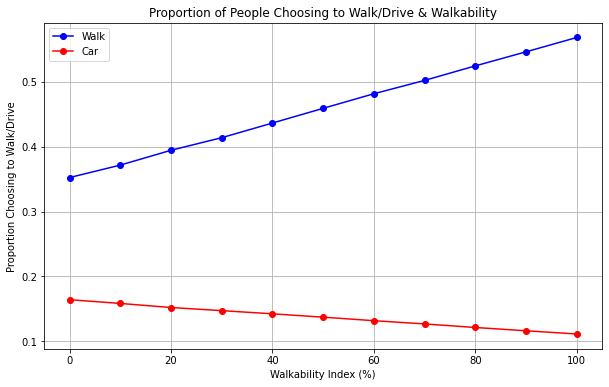

In [23]:
# Initialize lists to store results
walk_percentages = np.linspace(0, 100, 11)  # from 0% to 100% in 10% increments
proportions_walking = []
proportions_driving = []

for walk in walk_percentages:
    # Apply reduction in TT_WALK
    df_temp = df.copy()
    df_temp['WALKABILITY_INDEX'] = walk

    # Recalculate the utilities with the new TT_WALK
    df_temp['V_WALK'] = (
        0 +
        beta_values['beta_TT_WALK'] * df_temp['TT_WALK'] +
        beta_values['beta_WALKABILITY_INDEX'] * df_temp['WALKABILITY_INDEX'] +
        beta_values['beta_AV_WALK'] * df_temp['AV_WALK'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_CYCLE'] = (
        beta_values['beta_CYCLE'] +
        beta_values['beta_TT_CYCLE'] * df_temp['TT_CYCLE'] +
        beta_values['beta_BIKEABILITY_INDEX'] * df_temp['BIKEABILITY_INDEX'] +
        beta_values['beta_AV_CYCLE'] * df_temp['AV_CYCLE'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_PT'] = (
        beta_values['beta_PT'] +
        beta_values['beta_TT_PT'] * df_temp['TT_PT'] +
        beta_values['beta_FARE_PT'] * df_temp['FARE_PT'] +
        beta_values['beta_WT_PT'] * df_temp['WT_PT'] +
        beta_values['beta_AT_PT'] * df_temp['AT_PT'] +
        beta_values['beta_AC_PT'] * df_temp['AC_PT'] +
        beta_values['beta_AV_PT'] * df_temp['AV_PT'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )

    df_temp['V_CAR'] = (
        beta_values['beta_CAR'] +
        beta_values['beta_TT_CAR'] * df_temp['TT_CAR'] +
        beta_values['beta_FC_CAR'] * df_temp['FC_CAR'] +
        beta_values['beta_PC_CAR'] * df_temp['PC_CAR'] +
        beta_values['beta_CC_CAR'] * df_temp['CC_CAR'] +
        beta_values['beta_AV_CAR'] * df_temp['AV_CAR'] +
        beta_values['beta_AGE'] * df_temp['AGE'] +
        beta_values['beta_INCOME'] * df_temp['INCOME'] +
        beta_values['beta_GENDER'] * df_temp['GENDER'] +
        beta_values['beta_CAR_OWNERSHIP'] * df_temp['CAR_OWNERSHIP']
    )
    

    # Calculate exponentials of utility functions for the reduced dataframe
    df_temp['EXP_V_WALK'] = np.exp(df_temp['V_WALK'])
    df_temp['EXP_V_CYCLE'] = np.exp(df_temp['V_CYCLE'])
    df_temp['EXP_V_PT'] = np.exp(df_temp['V_PT'])
    df_temp['EXP_V_CAR'] = np.exp(df_temp['V_CAR'])

    # Calculate the probability of each mode using the utility functions from the original dataframe
    df_temp['P_WALK'] = df_temp['EXP_V_WALK'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_CYCLE'] = df_temp['EXP_V_CYCLE'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_PT'] = df_temp['EXP_V_PT'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])
    df_temp['P_CAR'] = df_temp['EXP_V_CAR'] / (df_temp['EXP_V_WALK'] + df_temp['EXP_V_CYCLE'] + df_temp['EXP_V_PT'] + df_temp['EXP_V_CAR'])


    # Create a boolean mask for each condition
    condition1w = df_temp['P_WALK'] > df_temp['P_CYCLE']
    condition2w = df_temp['P_WALK'] > df_temp['P_PT']
    condition3w = df_temp['P_WALK'] > df_temp['P_CAR']

    condition1d = df_temp['P_CAR'] > df_temp['P_CYCLE']
    condition2d = df_temp['P_CAR'] > df_temp['P_PT']
    condition3d = df_temp['P_CAR'] > df_temp['P_WALK']

    # Combine the conditions using the & operator to check if all conditions are True
    combined_conditionw = condition1w & condition2w & condition3w
    combined_conditiond = condition1d & condition2d & condition3d

    # Use sum() to count the number of True values in the combined condition
    proportion_walking = combined_conditionw.sum()/len(df_temp)
    proportions_walking.append(proportion_walking)

    proportion_driving = combined_conditiond.sum()/len(df_temp)
    proportions_driving.append(proportion_driving)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(walk_percentages, proportions_walking, marker='o', color='b', label = 'Walk')  # Multiply by 100 to convert to percentage
plt.plot(walk_percentages, proportions_driving, marker='o', color='r', label = 'Car')  # Multiply by 100 to convert to percentage
plt.xlabel('Walkability Index (%)')
plt.ylabel('Proportion Choosing to Walk/Drive')
plt.title('Proportion of People Choosing to Walk/Drive & Walkability')
plt.legend()
plt.grid(True)
plt.show()

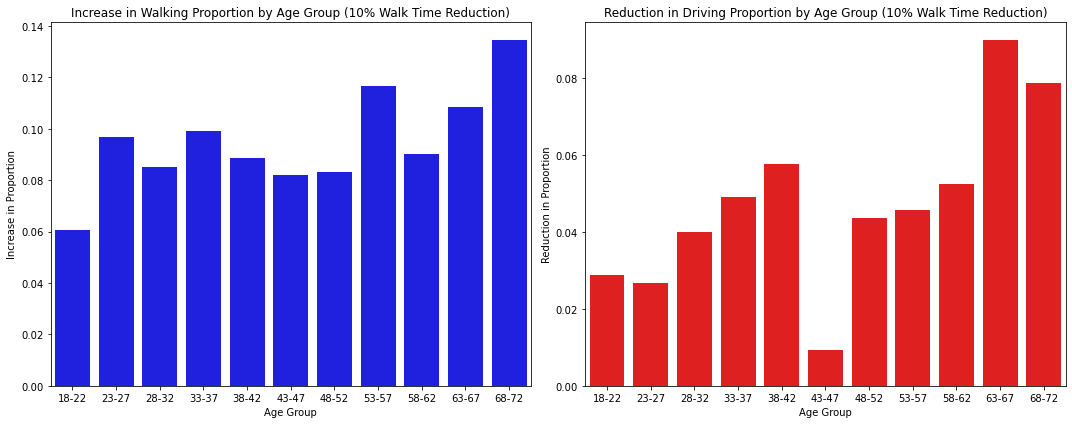

In [24]:
# Function to create age bins
def create_age_bins(dataframe, bin_size):
    max_age = 70
    min_age = 18
    bins = np.arange(min_age, max_age + bin_size, bin_size)
    labels = [f"{i}-{i+bin_size-1}" for i in bins[:-1]]
    dataframe['age_group'] = pd.cut(dataframe['AGE'], bins=bins, labels=labels, right=False)
    return dataframe

# Create age bins for both dataframes
df = create_age_bins(df, 5)
df_reduced = create_age_bins(df_reduced, 5)

# Calculate the proportion of people choosing to walk or drive in each age group
def calculate_proportions(dataframe):
    proportions = dataframe.groupby('age_group')['CHOSEN_MODE'].value_counts(normalize=True).unstack()
    proportions = proportions.fillna(0)  # Fill NaN values with 0
    return proportions

# Calculate proportions for both original and reduced dataframes
proportions_original = calculate_proportions(df)
proportions_reduced = calculate_proportions(df_reduced)

# Calculate the differences in proportions for walking and driving
diff_walking = proportions_reduced[1] - proportions_original[1]  # Increase in walking proportion
diff_driving = proportions_original[4] - proportions_reduced[4]  # Reduction in driving proportion

# Plotting the histograms
plt.figure(figsize=(15, 6))

# Histogram for increase in walking proportion
plt.subplot(1, 2, 1)
sns.barplot(x=diff_walking.index, y=diff_walking, color='blue')
plt.title('Increase in Walking Proportion by Age Group (10% Walk Time Reduction)')
plt.xlabel('Age Group')
plt.ylabel('Increase in Proportion')

# Histogram for reduction in driving proportion
plt.subplot(1, 2, 2)
sns.barplot(x=diff_driving.index, y=diff_driving, color='red')
plt.title('Reduction in Driving Proportion by Age Group (10% Walk Time Reduction)')
plt.xlabel('Age Group')
plt.ylabel('Reduction in Proportion')

plt.tight_layout()
plt.show()

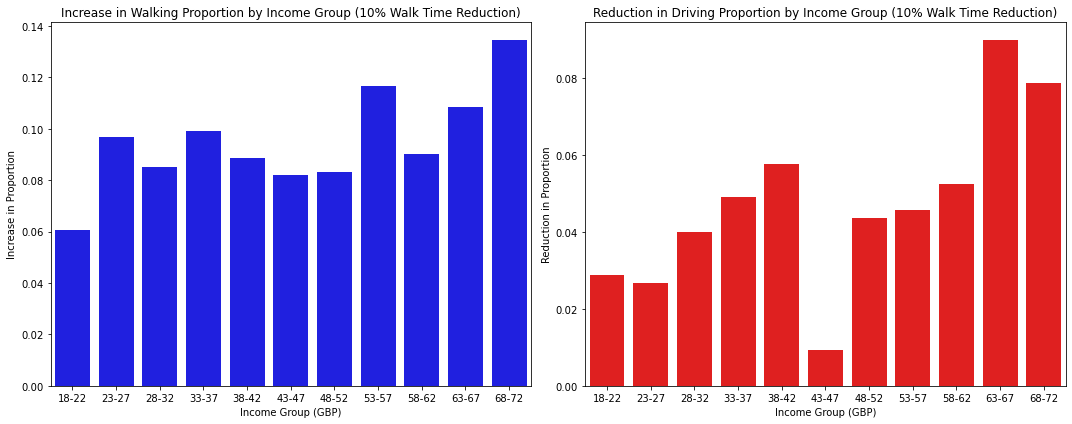

In [25]:
# Function to create income bins
def create_income_bins(dataframe):
    max_income = 100  # Represents 100k GBP
    min_income = 10   # Represents 10k GBP
    bin_size = 10     # Each bin represents 10k GBP
    bins = np.arange(min_income, max_income + bin_size, bin_size)
    labels = [f"{i}-{i+bin_size-9}k" for i in bins[:-1]]
    dataframe['income_group'] = pd.cut(dataframe['INCOME'], bins=bins, labels=labels, right=False)
    return dataframe

# Create income bins for both dataframes
df = create_income_bins(df)
df_reduced = create_income_bins(df_reduced)

# Calculate the proportions for each income group in both dataframes
proportions_original_income = calculate_proportions(df)
proportions_reduced_income = calculate_proportions(df_reduced)

# Calculate the differences in proportions for walking and driving
diff_walking_income = proportions_reduced_income[1] - proportions_original_income[1]  # Increase in walking proportion
diff_driving_income = proportions_original_income[4] - proportions_reduced_income[4]  # Reduction in driving proportion

# Plotting the histograms
plt.figure(figsize=(15, 6))

# Histogram for increase in walking proportion by income
plt.subplot(1, 2, 1)
sns.barplot(x=diff_walking_income.index, y=diff_walking_income, color='blue')
plt.title('Increase in Walking Proportion by Income Group (10% Walk Time Reduction)')
plt.xlabel('Income Group (GBP)')
plt.ylabel('Increase in Proportion')

# Histogram for reduction in driving proportion by income
plt.subplot(1, 2, 2)
sns.barplot(x=diff_driving_income.index, y=diff_driving_income, color='red')
plt.title('Reduction in Driving Proportion by Income Group (10% Walk Time Reduction)')
plt.xlabel('Income Group (GBP)')
plt.ylabel('Reduction in Proportion')

plt.tight_layout()
plt.show()
